
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Python Basics - Building Blocks for Machine Learning with scikit-learn 

### scikit-learn for Subsurface Machine Learning in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Building Blocks for Machine Learning with scikit learn for Subsurface Modeling in Python 

Here's a simple workflow, demonstration illustrating the building blocks for machine learning workflows in Python with [scikit-learn](https://scikit-learn.org/stable/). This should help you get started with building machine learning models. [Lecture on Machine Learning](https://www.youtube.com/watch?v=zOUM_AnI1DQ&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=10&t=39s)

Here's some basic details about scikit-learn.  

#### scikit-learn

A powerful Python package for machine learning. Most methods follow these steps:
    
1. **instantiation** - make the model object while setting the model hyperparameters
2. **fitting** - train the model with the training data
3. **prediction** - make predictions with the trained model, e.g. at testing data
4. **model tuning** - I demonstrate the cross validation approach with train and test data subsets

Other comments:

* there are method specific functions to access model parameters, score models

* for brevity I have excluded much of the regular data visualization and checking

#### Bulding Blocks

This is not a demonstration, best practice workflow, instead it is a set of building blocks demonstrating common steps in predictive machine learning in Python with scikit-learn.

The intention is to provide building blocks to assist my [new to workflow creation] students over the hurdle of machine learning workflow construction.

* This is in response to the struggle that I observed from my students on their first predictive machine learnin assignment.

* I'm all about accessible education, let's see if this fills in some Python workflow creation gaps!

#### Other Resources

Here's additional demonstrations with more details and code examples for:

* **[panda's DataFrames](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_DataFrame.ipynb)**

* **[NumPy's ndarrays](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/PythonDataBasics_ndarrays.ipynb)**

* **[Plotting](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/GeostatsPy_plottingdata.ipynb)**

* **[Various Python Demonstrations](https://github.com/GeostatsGuy/PythonNumericalDemos)**

* **[Machine Learning Lectures](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf)**

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

There are examples below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

Let's import the following packages required for our demonstration.

In [1]:
import os                                                 # to set current working directory 
import math                                               # basic calculations like square root
from sklearn.model_selection import train_test_split      # train and test split
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)
from sklearn.metrics import mean_squared_error            # specific measures to check our models
import pandas as pd                                       # DataFrames for tabular data
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # general plotting
import seaborn as sns                                     # density plots

#### Declare Functions

This function takes our trained model, predictor and response features and plots the data and an exhaustive mesh of predictions so we can visualize our model

* this function assumes 2 predictor features and 1 response feature 

In [85]:
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the decision tree prediction 
    #plt.figure(figsize=(8, 6))
    cmap = plt.cm.inferno
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 # resolution of the model visualization
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), # set up the mesh
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])      # predict with our trained model over the mesh
    Z = Z.reshape(xx.shape)
    plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="white")
    im = plt.imshow(Z,interpolation = None,aspect = "auto",extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap = cmap)
    plt.title(title)                                       # add the labels
    plt.xlabel(xfeature.name); plt.ylabel(yfeature.name)
    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    cbar = plt.colorbar(im, orientation = 'vertical')      # add the color bar
    cbar.set_label(response.name, rotation=270, labelpad=20)
    return(plt)

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).  Also, in this case make sure to place the required (see below) data file in this working directory.  

In [86]:
os.chdir("c:\PGE383")                                     # set the working directory

#### Set the Random Seed Number

This specified the string of random values from from NumPy's random number generator

* repeatability between all the students in the class so we can discuss results, because we will have the same results for the same model choices

In [87]:
np.random.seed(73073)                                     # set the random number seed

#### Load the Data

Let's load the provided dataset. 'unconv_MV.csv' is available in this repository https://github.com/GeostatsGuy/GeoDataSets. 

* here's a link to the data file [unconv_MV.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv)

* aside, these .csv files easily load into Excel 

This dataset has variables from 1,000 subsurface wells including:

* well average porosity
* log transform of permeability (to linearize the relationships with other variables)
* accoustic impedance (kg/m^3 x m/s x 10^6)
* brittness ratio (%)
* total organic carbon (%)
* vitrinite reflectance (%)
* initial production 90 day average (MCFPD).  

Note, the dataset is synthetic.

We load the data file with the pandas 'read_csv' function into a data frame we called 'df' and then separate it into train and test datasets.  

* the samples are in random order so we oculd just split the dataset by slice.  

In [88]:
my_data = pd.read_csv("unconv_MV.csv")                    # load the comma delimited data file

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [89]:
my_data.head()                                            # preview the first 5 rows of the dataframe

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919


#### OPTIONAL: Add Random Error

The dataset is error free and the demonstration will not show reduced performance in testing with increasing complexity 

* the original dataset does not show a good example of overfit

* to illustrate overfit the following code adds random error to the response feature applied in the workflow below

We use the random Monte Carlo simulation from a Gaussian distribution method from NumPy

```python
np.random.normal(loc=0.0,scale=1000.0,size=len(my_data))
```

* yes, it uses our random number seed set above

* 'loc' is the mean

* 'scale' is the standard deviation

* 'size' is the number of random Monte Carlo samples from the specified Gaussian distribution

In [90]:
my_data['Production'] = my_data['Production'] + np.random.normal(loc=0.0,scale=1000.0,size=len(my_data))

Let's remove the well index and check the summary summary statistics.

In [91]:
my_data = my_data.iloc[:,1:8]                             # slice all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.4000,12.857500,14.985000,17.080000,24.650000
LogPerm,1000.0,1.398880,0.405966,0.1200,1.130000,1.390000,1.680000,2.580000
AI,1000.0,2.982610,0.577629,0.9600,2.577500,3.010000,3.360000,4.700000
Brittle,1000.0,49.719480,15.077006,-10.5000,39.722500,49.680000,59.170000,93.470000
TOC,1000.0,1.003810,0.504978,-0.2600,0.640000,0.995000,1.360000,2.710000
VR,1000.0,1.991170,0.308194,0.9000,1.810000,2.000000,2.172500,2.900000
Production,1000.0,2270.472269,1835.741391,-2573.0336,973.470741,2103.956366,3387.798753,12996.077608


It is good that we checked the summary statistics, because we have some negative values for brittleness and total organic carbon. 

* the is physically imposible.  The values must be in error. 

* we know the lowest possible values are 0.0, so we will truncate on 0.0.  

We use the *get_numerical_data()* DataFrame member function to get a shallow copy of the data from the DataFrame.  

* since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  

* this allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [92]:
num = my_data._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                          # truncate negative values to 0.0
my_data.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.40,12.857500,14.985000,17.080000,24.650000
LogPerm,1000.0,1.398880,0.405966,0.12,1.130000,1.390000,1.680000,2.580000
AI,1000.0,2.982610,0.577629,0.96,2.577500,3.010000,3.360000,4.700000
Brittle,1000.0,49.731480,15.033593,0.00,39.722500,49.680000,59.170000,93.470000
TOC,1000.0,1.006170,0.499838,0.00,0.640000,0.995000,1.360000,2.710000
VR,1000.0,1.991170,0.308194,0.90,1.810000,2.000000,2.172500,2.900000
Production,1000.0,2326.186715,1745.760538,0.00,973.470741,2103.956366,3387.798753,12996.077608


#### Splicing the DataFrame, Working with the Features of Interest

I find it useful to slice the DataFrame for new DataFrames with only the features that I need

* this will help us avoid blunders like using the wrong feature in our workflow

* note, this is a shallow copy, any changes to the new DataFrame will be present in the original DataFrame!

* the result is a new DataFrame with a subset of the original DataFrame

In [93]:
X = my_data[['Por','Brittle']]                            # slice predictor features, porosity and brittleness all samples
y = my_data[['Production']]                               # slice repsonse features, production all samples

Here's some more examples of slicing DataFrames:

Take the first 10 samples of Por and Brittle features:

```python
X = my_data.loc[:10,['Por','Brittle']]                     # slice predictor features, porosity and brittleness all samples
```

Take the last 10 samples of Por, Brittle and AI features:

```python
X = my_data.loc[len(my_data)-10:,['Por','Brittle','AI']]   # slice predictor features, porosity and brittleness last 10 samples
```

Take the last 10 samples of the last 2 feature:

```python
my_data.iloc[len(my_data)-10:,-2:]                         # slice predictor features, VR and production last 10 samples
```

Take all samples of the 1st, 4th, 5th and 6th feature:

```python
my_data.iloc[:,np.r_[1,4:7]]                               # slice with disocntinuous ranges of features
```

#### Set Some Constants

Let's set some constants that we will need for our workflow.


In [94]:
por_min = 0.0; por_max = 25.0                             # predictor feature 1, X1, range           
brittle_min = 0.0; brittle_max = 100.0                    # predictor feature 2, X2, range
prod_min = 0.0; prod_max = 10000.0                        # response feature range
cmap = plt.cm.inferno                                     # color map, variable tone and intensity for color blind individuals, and inferno is rad
error_min = -4000.0; error_max = 4000.0                   # prediction error range
nbin = 40                                                 # number of bins in histograms

#### Train and Test Split

Now we do a train and test split with scikit-learn's .train_test_split() function

* random selection with the test size specified as a proportion of data withheld for test

* the input is 2 DataFrame with predictors, X, and response, y, features

* output is 4 DataFrames with train and test, predictor and response features

* we specify the random number seed (random_state) to ensure all students have the same random train and test split

* note, by specifying random_state=None, our random seed in NumPy constrains this result, although it you repeat the command below you will get a different set of train and test data

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None) # train and test split
n_train = len(X_train)
n_test = len(X_test)
print('Number of training ' + str(n_train) + ', number of test ' + str(n_test))

Number of training 800, number of test 200


If the dataset is already randomly ordered, then one could use splicing to split into test and train data sets.

```python
X_train = my_data.loc[:n_train,['Por','Brittle']]          # slice predictor features, porosity and brittleness n_train samples
X_test = my_data.loc[n_train:,['Por','Brittle']]           # slice predictor features, porosity and brittleness n_text (n-n_train) samples
```

#### Plotting the Data For 2 Predictor Features and 1 Response Feature

Let's take a look at the training and testing data 

* with 2 predictor features and 1 response feature it is convenient to use a scattet plot from the matplotlib package

A convenient way to combine figures on a regular grid is to use the matplotlib .subplot() command: 

```python
plt.subplot(234)                                            # 2 rows, 3 columns, 4th plot index 
```

* the plot index sorts left to right and then top to bottom

I also like to use the .subplots_adjust() command to scale the plot and spacing between the plots:

```python
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2) # right for width, top for height, wspace for horizontal spacing, hspace for vertical spacing
```

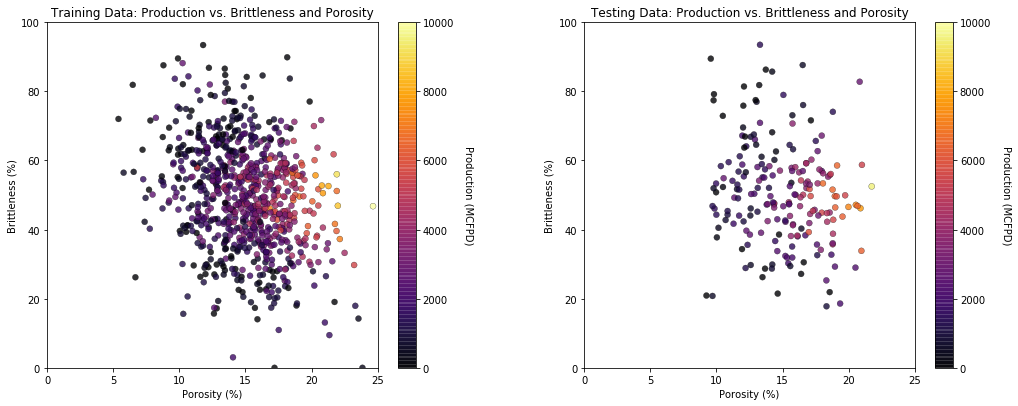

In [96]:
plt.subplot(121)                                          # scatter plot of the training data, 1 row x 2 columns
im = plt.scatter(X_train["Por"],X_train["Brittle"],s=None, c=y_train["Production"], marker=None, cmap=cmap, norm=None, vmin=prod_min, vmax=prod_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Data: Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(por_min,por_max); plt.ylim(brittle_min,brittle_max)
cbar.set_label("Production (MCFPD)", rotation=270, labelpad=20)

plt.subplot(122)                                          # scatter plot of the testing data, 1 row x 2 columns
im = plt.scatter(X_test["Por"],X_test["Brittle"],s=None, c=y_test["Production"], marker=None, cmap=cmap, norm=None, vmin=prod_min, vmax=prod_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Data: Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
cbar = plt.colorbar(im, orientation = 'vertical'); plt.xlim(por_min,por_max); plt.ylim(brittle_min,brittle_max)
cbar.set_label("Production (MCFPD)", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

#### Training and Visualizing a Machine Learning Model

Let's train and visualize our simple machine learning model with scikit-learn.  

* we work with a regression decision tree, [Lecture on Decision Tree](https://www.youtube.com/watch?v=JUGo1Pu3QT4&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=37&t=9s).  

* we use both predictor features, porosity and brittleness, and one response feature, production.

We cover the instantiate, train (fit) and visualize the model first.

* let's just select a value for the hyperparameter for our decision tree

```python
decision_tree_reg = tree.DecisionTreeRegressor(max_leaf_nodes = 20)
```

* **max_leaf_nodes** is the maximum number of regions in the decision tree model, in the visualization you'll see the regions on constant prediction blocks 

* note, that if you have only 1 predictor feature you must add the .reshape(n,1) function to convert the 1D ndarray to a 2D ndarray with dimension 2 having a length of 1. For example:

```python
X_train["Por"].values.reshape(n_train,1)
```

* otherwise scikit-learn will return an error.

* we use our convenience function, visualize_model() defined above, to calculate and plot the estimates from our trained model over a mesh (2D ndarray) of the predictor feature space to visualize the model.

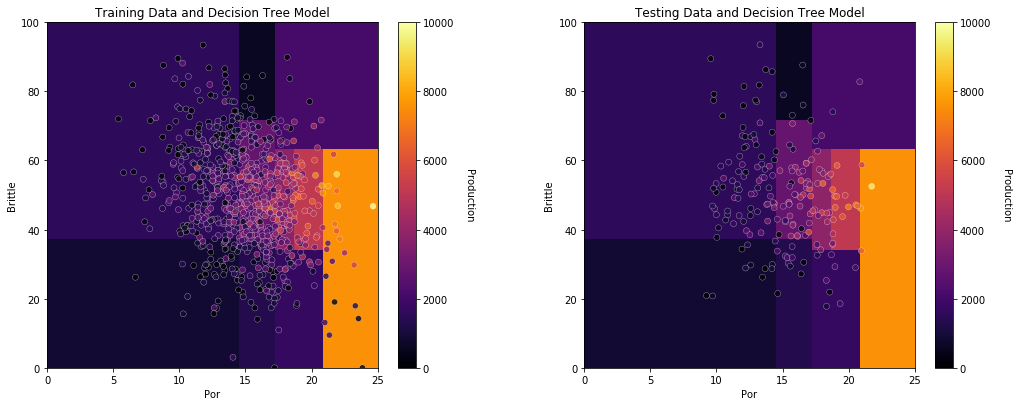

In [97]:
# Step 1. Instantiate the Model 
decision_tree_reg = tree.DecisionTreeRegressor(max_leaf_nodes = 10) # make the model object and set the hyperparameters

# Step 2: Train (Fit) the Model with Training Data
decision_tree_reg.fit(X_train.values, y_train["Production"].values) # train (fit) the model with the training data
#multilinear_reg.fit(X_train["Por"].values.reshape(n_train,1), y_train["Production"]) # use this template if only 1 predictor feature

# Plot trained model over the predictor feature space - function makes a mesh, predicts over mesh and plots
plt.subplot(121)
plt = visualize_model(decision_tree_reg,X_train["Por"],por_min,por_max,X_train["Brittle"],brittle_min,brittle_max,
                      y_train["Production"],prod_min,prod_max,'Training Data and Decision Tree Model')

plt.subplot(122)
plt = visualize_model(decision_tree_reg,X_test["Por"],por_min,por_max,X_test["Brittle"],brittle_min,brittle_max,
                      y_test["Production"],prod_min,prod_max,'Testing Data and Decision Tree Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

Did you notice that I use .values. I do this to convert the DataFrame or Series (if 1 feature) into ndarrays

```python
X_train.values                                           # ndarray
X_train                                                  # DataFrame
```
Technically, scikit-learn expects 'array-like' input, ndarrays and even DataFrame work. I like to explicitly send an ndarray.

* **coding tip**: explicit statements in coding can improve readability and catch errors as we avoid assumptions

#### Predicting and Checking the Machine Learning Model at the Training Data 

Let's use the trained (fit), with training data, machine learning model to make predictions over the training data

* this provides an opportunity to check the fit to the training data

We will predict at the training data locations with the scikit-learn .predict() function (same as used in the function above)

* the output is a 1D ndarray in the same order as the original training data in the X_train and y_train DataFrame

* we can difference (subtract the the original truth values' ndarray from the prediction ndarray) to get the model error / residual over the training data as a new ndarray

```python
y_train_resid = y_train_pred - y_train['Production'].values # calculate the residuals over the training data
```

* ndarry1 = ndarray2 - ndarray3, the resulting ndarray1 is the element-wise subtraction, ndarray2 and ndarry3 must have the same dimension

* we can use this error for various diagnostic plots

We will use the scikit-learn .mean_squared_error() function from the metrics module to summarize the model fit

* **mean square error (MSE)** is the L2 norm of the vector of error over the data, training data in this case, so the result is training MSE, [Lecture on Norms](https://www.youtube.com/watch?v=JmxGlrurQp0&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=19)

* .mean_squared_error() function inputs are truth and predictions each in 1D array-like objects

* the calculation assumes the indices match (samples in the same order)

We produce the following diagnostic plots:

1. histogram of the prediction error (prediction - truth) - check for global bias, shape of error distribution

2. scatter plot of prediction vs. truth values - check for cases with high error

3. scatter plot of prediction error vs. prediction values - check for conditional bias

Variance explained training: 1182929.17
Training: Average error = -0.00
Training: Standard Deviation error = 1087.63


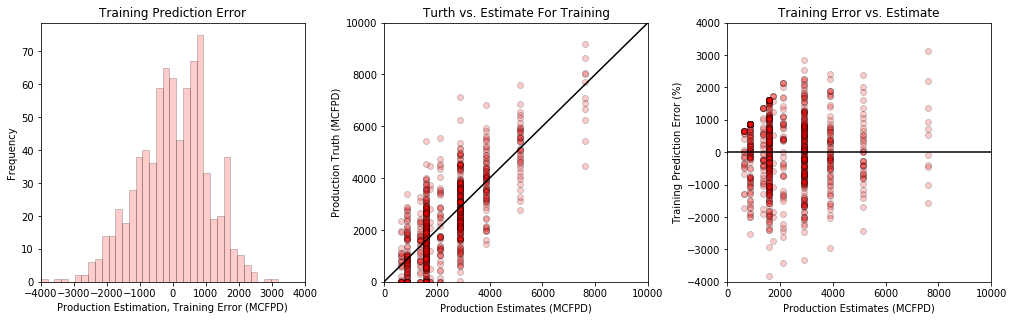

In [98]:
# Step 3: - Make predictions using the training dataset
y_train_pred = decision_tree_reg.predict(X_train.values)        # predict with the trained model at the training data samples 

# Report the goodness of fit
MSE_train = mean_squared_error(y_train, y_train_pred)           # calculate the training MSE      
print('Variance explained training: %.2f' % MSE_train)

y_train_resid = y_train_pred - y_train['Production'].values     # calculate the residuals over the training data

print('Training: Average error = %.2f' % np.average(y_train_resid)) # calculate the average testing error 
print('Training: Standard Deviation error = %.2f' % np.std(y_train_resid)) # calculate the standard deviation testing error

plt.subplot(131)                                                # histogram of training error
plt.hist(y_train_resid, alpha = 0.2, color = 'red', edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin))
plt.title('Training Prediction Error'); plt.xlabel('Production Estimation, Training Error (MCFPD)'); plt.ylabel('Frequency')
plt.xlim(error_min,error_max)#; plt.ylim(0,1500000)

plt.subplot(132)                                                # scatter plot of truth values vs. predictions 
plt.scatter(y_train_pred,y_train['Production'].values,c='red',alpha=0.2,edgecolor='black')
plt.title('Turth vs. Estimate For Training'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Production Truth (MCFPD)')
plt.plot([prod_min,prod_max],[prod_min,prod_max],c='black')
plt.xlim(prod_min,prod_max); plt.ylim(prod_min,prod_max)

plt.subplot(133)                                                # scatter plot of error vs. predictions
plt.scatter(y_train_pred,y_train_resid,c='red',alpha=0.2,edgecolor='black')
plt.title('Training Error vs. Estimate'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Training Prediction Error (%)')
plt.plot([prod_min,prod_max],[0,0],c='black')
plt.xlim(prod_min,prod_max); plt.ylim(error_min,error_max)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)
plt.show()

#### Predicting and Checking the Machine Learning Model at Over the Testing Data 

Let's use the trained (fit) machine learning model to make predictions over the withheld testing data

* we repeat what we did above with the training data, now we make predictions over the testing data and compare the predictions with the truth values

```python
y_test_resid = y_test_pred - y_test['Production'].values
```


Testing: Variance explained = 1490414.88
Testing: Average error = -57.88
Testing: Standard Deviation error = 1219.45


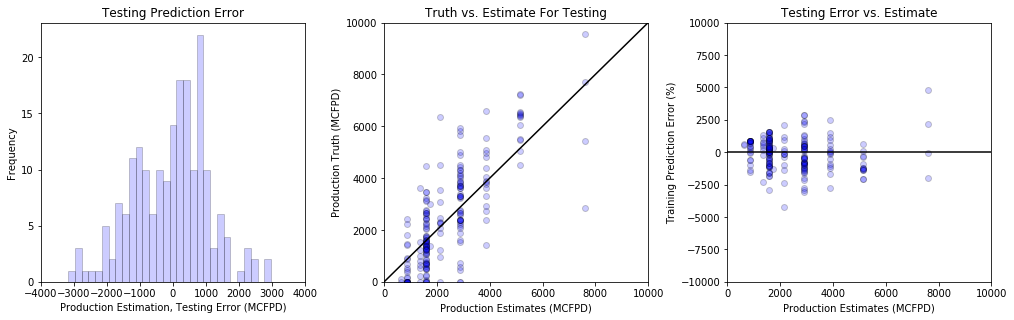

In [99]:
# Step 4: - Make predictions using the testing dataset
y_test_pred = decision_tree_reg.predict(X_test.values)          # predict with the trained model at the training data samples 

# Report the goodness of fit
MSE_test = mean_squared_error(y_test, y_test_pred)              # calculate the testing MSE      
print('Testing: Variance explained = %.2f' % MSE_test)

y_test_resid = y_test_pred - y_test['Production'].values        # calculate the residuals over the testing data

print('Testing: Average error = %.2f' % np.average(y_test_resid)) # calculate the average testing error 
print('Testing: Standard Deviation error = %.2f' % np.std(y_test_resid)) # calculate the standard deviation testing error

plt.subplot(131)                                                # histogram of training error
plt.hist(y_test_resid, alpha = 0.2, color = 'blue', edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin))
plt.title('Testing Prediction Error'); plt.xlabel('Production Estimation, Testing Error (MCFPD)'); plt.ylabel('Frequency')
plt.xlim(error_min,error_max)#; plt.ylim(0,1500000)

plt.subplot(132)                                                # scatter plot of truth values vs. predictions 
plt.scatter(y_test_pred,y_test['Production'].values,c='blue',alpha=0.2,edgecolor='black')
plt.title('Truth vs. Estimate For Testing'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Production Truth (MCFPD)')
plt.plot([prod_min,prod_max],[prod_min,prod_max],c='black')
plt.xlim(prod_min,prod_max); plt.ylim(prod_min,prod_max)

plt.subplot(133)                                                # scatter plot of error vs. predictions
plt.scatter(y_test_pred,y_test_resid,c='blue',alpha=0.2,edgecolor='black')
plt.title('Testing Error vs. Estimate'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Training Prediction Error (%)')
plt.plot([prod_min,prod_max],[0,0],c='black')
plt.xlim(prod_min,prod_max); plt.ylim(-10000,10000)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)
plt.show()

#### Combining the Training and Testing Model Check Diagnostic Plots

Let's combine the training and testing model check diagnostic plots

* this is easy as we can combine plots in matplotlib like this

```python
plt.subplot(111)
plt.hist(y_train_resid, alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.hist(y_test_resid, alpha = 0.2, color = 'blue', edgecolor = 'black', bins=20)
```

I switch to a normalized histogram (Density = True) so the histograms match

* because with more training data than testing data the frequences are quite different

I add a legend by:

* adding a label to each plot's parameters and adding the plt.legend() function

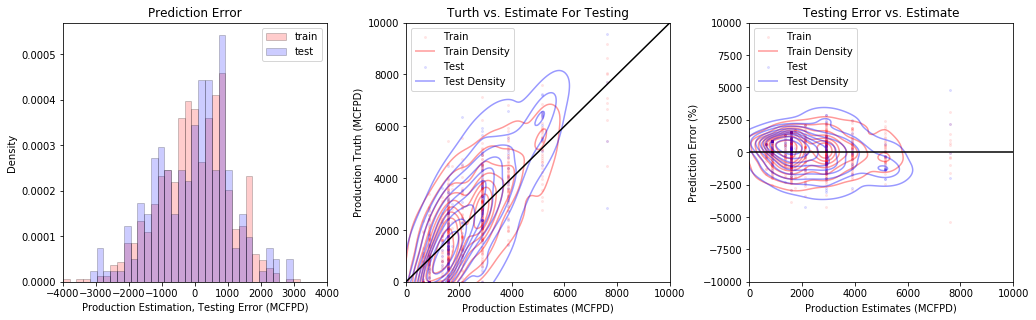

In [100]:
plt.subplot(131)                                                # histogram of training error
plt.hist(y_train_resid, alpha = 0.2, color = 'red', density = True, edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin), label = "train")
plt.hist(y_test_resid, alpha = 0.2, color = 'blue', density = True, edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin), label = "test")
plt.title('Prediction Error'); plt.xlabel('Production Estimation, Testing Error (MCFPD)'); plt.ylabel('Density')
plt.legend()
plt.xlim(error_min,error_max)#; plt.ylim(0,1500000)

plt.subplot(132)                                                # scatter plot of truth values vs. predictions
plt.scatter(y_train_pred,y_train['Production'].values,c='red',s = 4, marker = 'x', alpha=0.1,label="Train")
df_check_train = pd.DataFrame(np.stack((y_train_pred,y_train['Production'].values),axis=1),columns=['Estimated','Truth'])
sns.kdeplot(data=df_check_train, x="Estimated", y="Truth",color='red',alpha=0.4,label ="Train Density")
plt.scatter(y_test_pred,y_test['Production'].values,c='blue',s = 4, marker = 'o', alpha=0.1,label="Test")
df_check_test = pd.DataFrame(np.stack((y_test_pred,y_test['Production'].values),axis=1),columns=['Estimated','Truth'])
sns.kdeplot(data=df_check_test, x="Estimated", y="Truth",color='blue',alpha=0.4,label = "Test Density")
plt.plot([prod_min,prod_max],[prod_min,prod_max],c='black')
plt.title('Turth vs. Estimate For Testing'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Production Truth (MCFPD)')
plt.xlim(prod_min,prod_max); plt.ylim(prod_min,prod_max)
plt.legend()

plt.subplot(133)                                                # scatter plot of error vs. predictions
plt.scatter(y_train_pred,y_train_resid,c='red',s=4,marker='x',alpha=0.1,label="Train")
df_check2_train = pd.DataFrame(np.stack((y_train_pred,y_train_resid),axis=1),columns=['Estimated','Resid'])
sns.kdeplot(data=df_check2_train, x="Estimated", y="Resid",color='red',alpha=0.4,label = "Train Density")
plt.scatter(y_test_pred,y_test_resid,c='blue',s=4,marker='o',alpha=0.1,label="Test")
df_check2_test = pd.DataFrame(np.stack((y_test_pred,y_test_resid),axis=1),columns=['Estimated','Resid'])
sns.kdeplot(data=df_check2_test, x="Estimated", y="Resid",color='blue',alpha=0.4, label = "Test Density")
plt.title('Testing Error vs. Estimate'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Prediction Error (%)')
plt.plot([prod_min,prod_max],[0,0],c='black')
plt.xlim(prod_min,prod_max); plt.ylim(-10000,10000)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)
plt.show()

#### Hyperparameter Tuning by Cross Validation

Now we will demonstrate hyperparameter tuning with cross validation 

* we iterative over a range of hyperparameter values and rerun our workflow for each hyperparameter to calculate the error in training and testing

* we plot the model metric versus the hyperparameter for the training and testing cases

We use the np.linspace() command to make a 1D array with the values of the hyperparameter

* np.linspace(min,max,num)

* from a min to a max with a number of equal spaced samples, num

```python
leaf_nodes = np.linspace(1,5,5)                                 # results in the 1D ndarray [1,2,3,4,5]
```

* for log scale use np.logspace(min,max,num) where min and max are exponents (base 10).

```python
lambdas = np.logspace(1,5,5)                                    # results in the 1D ndarray 
                                                                # [10,100,1000,10000,100000]
```
Once we have this ndarray of hyperparameter values we will loop over our workflow with the for in eunurate() method

```python
for i, ilead_node in enumerate(leaf_nodes):                     # loop over all lambda values
``` 

* we must indent (4 spaces) for the duration of the code in the loop

* for each loop, the variable 'ilead_node' will step over the values in the array terminal_nodes so we can use 'ileaf_node' as the hyperparameter choice for each model instantiation.

* for each loop, i will increment, 0,1,2,...,len(leaf_nodes)-1, we can use 'i' to store the resulting training and testing metric in our 1D ndarrays (see below)

If we did not need the 'i' index we could have used the in range() method

```python
for ilead_node in (leaf_nodes):                                 # loop over all lambda values
``` 

To store the error in training and testing from each loop (interation over the hyperparameter) we declare 2 ndarrays

```python
mse_train = np.zeros(ncases); mse_test = np.zeros(ncases)
```

* makes arrays of length 'ncase' initialized to zeros for the MSE train and test

We can access any element in the ndarray like this.

```python
mse_train[13] = 7.0

```

* hint you can use log or linear scale on any axis with matplotlib

```python
plt.yscale("linear")
plt.xscale("log")
```

Minimum MSE with hyperparameter leaf nodes = 32


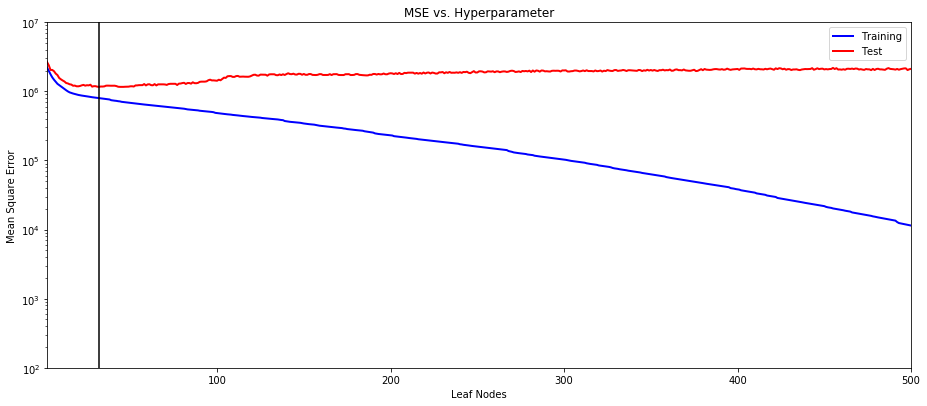

In [101]:
# Arrays to store the results
ncase = 500                                                     # set the number of hyperparameter cases [2,3,...,ncase]
leaf_nodes = np.linspace(2,ncase+1,ncase)                       # make ndarray with hyperparameter cases

mse_train = np.zeros(ncase); mse_test = np.zeros(ncase)         # declare 2 1D ndarrays to store the error in training and testing

for i,ileaf_node in enumerate(leaf_nodes):                      # loop over all lambda values
    decision_tree_reg_iter = tree.DecisionTreeRegressor(max_leaf_nodes = int(ileaf_node)) # instantiate the model
    decision_tree_reg_iter.fit(X_train.values, y_train["Production"].values) # train (fit) model with training data
 
    pred_train = decision_tree_reg_iter.predict(X_train.values)      # predict with the fit model at training data
    mse_train[i] = mean_squared_error(y_train["Production"].values, pred_train) # calculate MSE training
    
    pred_test = decision_tree_reg_iter.predict(X_test.values)        # predict with the fit model at testing data 
    mse_test[i] = mean_squared_error(y_test["Production"].values, pred_test) # calculate MSE testing   

imin = np.argmin(mse_test)                                      # find the ndarray index with the minimum testing error
tuned_leaf_node = int(leaf_nodes[imin])                         # get the hyperparameter value with the minimum testing error
print('Minimum MSE with hyperparameter leaf nodes = %.0f' % tuned_leaf_node)

plt.subplot(111)                                                # plot the error in training and testing vs. the hyperparameter
plt.plot(leaf_nodes, mse_train,  color='blue', linewidth = 2, label = 'Training') # error in training
plt.plot(leaf_nodes, mse_test,  color='red', linewidth = 2, label = 'Test') # error in testing
plt.plot([tuned_leaf_node,tuned_leaf_node],[100,100000000.0],color='black') # vertical line at hyperparameter value that minimizes testing error 
plt.title('MSE vs. Hyperparameter'); plt.xlabel('Leaf Nodes'); plt.ylabel('Mean Square Error') # label the plot
plt.xlim(2,ncase); plt.ylim(100,10000000.0); plt.xscale("linear"); plt.yscale("log")
plt.legend()                                                     # add a legend

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()
    

#### Train (Fit) and Predict the Tuned Model

Now we can select the optimum hyperparameter value, and with the hyperparameter tuned, fit and check our model.

Variance explained training: 1182929.17
Tuned Model Training: Average error = -0.00
Tuned Model Training: Standard Deviation error = 918.99
Tuned Model Testing: Variance explained = 1490414.88
Tuned Model Testing: Average error = -58.53
Tuned Model Testing: Standard Deviation error = 1105.36


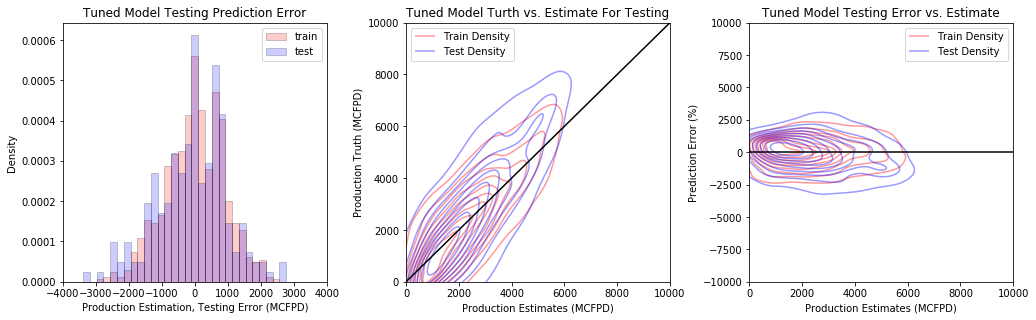

In [102]:
nleaf_node_tuned = 25                                           # the hyperparameter value that minimized error in testing

# Step 1. Instantiate the Model 
decision_tree_reg_tuned = tree.DecisionTreeRegressor(max_leaf_nodes = nleaf_node_tuned) # make the model object and set the hyperparameters

# Step 2: Fit the Data on Training Data
decision_tree_reg_tuned.fit(X_train.values, y_train["Production"].values) # train (fit) the model with the training data
#multilinear_reg.fit(X_train["Por"].values.reshape(n_train,1), y_train["Production"]) # use this template if only 1 predictor feature

# Step 3: - Make predictions using the training dataset
y_train_pred = decision_tree_reg_tuned.predict(X_train.values)  # predict with the trained model at the training data samples 

# Report the goodness of fit
MSE_train_tuned = mean_squared_error(y_train, y_train_pred)     # calculate the training MSE      
print('Variance explained training: %.2f' % MSE_train)

y_train_resid = y_train_pred - y_train['Production'].values     # calculate the residuals over the training data

print('Tuned Model Training: Average error = %.2f' % np.average(y_train_resid)) # calculate the average testing error 
print('Tuned Model Training: Standard Deviation error = %.2f' % np.std(y_train_resid)) # calculate the standard deviation testing error

# Step 4: - Make predictions using the testing dataset
y_test_pred = decision_tree_reg_tuned.predict(X_test.values)    # predict with the trained model at the training data samples 

# Report the goodness of fit
MSE_test_tuned = mean_squared_error(y_test, y_test_pred)        # calculate the testing MSE      
print('Tuned Model Testing: Variance explained = %.2f' % MSE_test)

y_test_resid = y_test_pred - y_test['Production'].values        # calculate the residuals over the testing data

print('Tuned Model Testing: Average error = %.2f' % np.average(y_test_resid)) # calculate the average testing error 
print('Tuned Model Testing: Standard Deviation error = %.2f' % np.std(y_test_resid)) # calculate the standard deviation testing error


plt.subplot(131)                                                # histogram of training error
plt.hist(y_train_resid, alpha = 0.2, color = 'red', density = True, edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin), label = "train")
plt.hist(y_test_resid, alpha = 0.2, color = 'blue', density = True, edgecolor = 'black', bins=np.linspace(error_min,error_max,nbin), label = "test")
plt.title('Tuned Model Testing Prediction Error'); plt.xlabel('Production Estimation, Testing Error (MCFPD)'); plt.ylabel('Density')
plt.legend()
plt.xlim(error_min,error_max)#; plt.ylim(0,1500000)

plt.subplot(132)                                                # scatter plot of truth values vs. predictions
df_check_train = pd.DataFrame(np.stack((y_train_pred,y_train['Production'].values),axis=1),columns=['Estimated','Truth'])
sns.kdeplot(data=df_check_train, x="Estimated", y="Truth",color='red',alpha=0.4,label ="Train Density")
df_check_test = pd.DataFrame(np.stack((y_test_pred,y_test['Production'].values),axis=1),columns=['Estimated','Truth'])
sns.kdeplot(data=df_check_test, x="Estimated", y="Truth",color='blue',alpha=0.4,label = "Test Density")
plt.plot([prod_min,prod_max],[prod_min,prod_max],c='black')
plt.title('Tuned Model Turth vs. Estimate For Testing'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Production Truth (MCFPD)')
plt.xlim(prod_min,prod_max); plt.ylim(prod_min,prod_max)
plt.legend()

plt.subplot(133)                                                # scatter plot of error vs. predictions
df_check2_train = pd.DataFrame(np.stack((y_train_pred,y_train_resid),axis=1),columns=['Estimated','Resid'])
sns.kdeplot(data=df_check2_train, x="Estimated", y="Resid",color='red',alpha=0.4,label = "Train Density")
df_check2_test = pd.DataFrame(np.stack((y_test_pred,y_test_resid),axis=1),columns=['Estimated','Resid'])
sns.kdeplot(data=df_check2_test, x="Estimated", y="Resid",color='blue',alpha=0.4, label = "Test Density")
plt.title('Tuned Model Testing Error vs. Estimate'); plt.xlabel('Production Estimates (MCFPD)'); plt.ylabel('Prediction Error (%)')
plt.plot([prod_min,prod_max],[0,0],c='black')
plt.xlim(prod_min,prod_max); plt.ylim(-10000,10000)
plt.legend()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=0.9, wspace=0.3, hspace=0.2)
plt.show()

#### Visualize the Original and Tuned Models

Let's look at the original and tuned machine learning model with the training and testing data

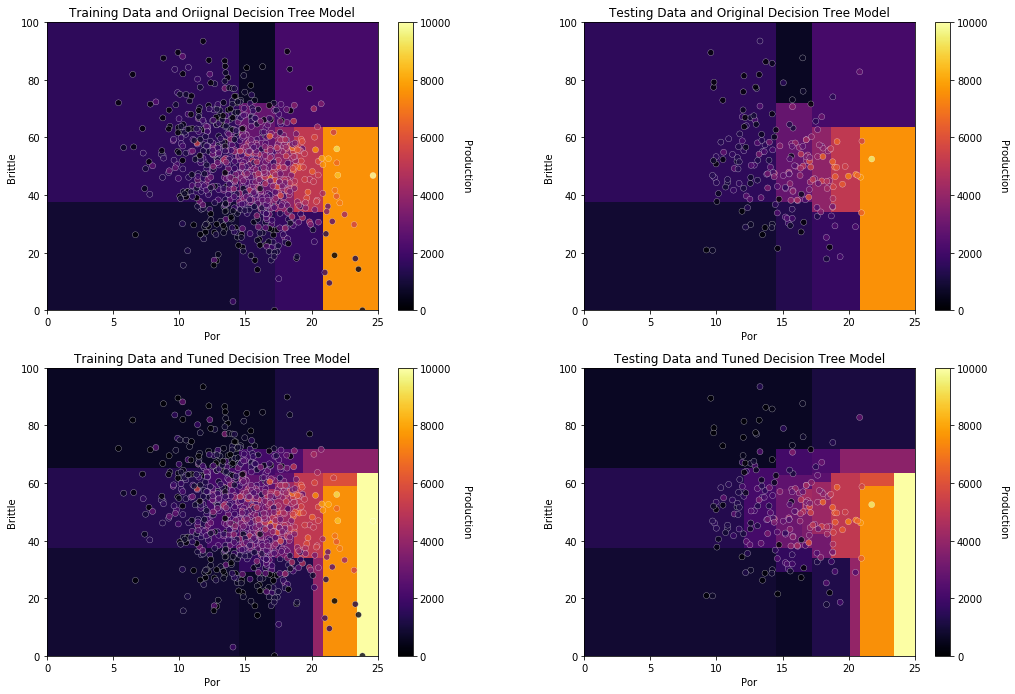

In [103]:
# Plot trained model over the predictor feature space - function makes a mesh, predicts over mesh and plots
plt.subplot(221)
plt = visualize_model(decision_tree_reg,X_train["Por"],por_min,por_max,X_train["Brittle"],brittle_min,brittle_max,
                      y_train["Production"],prod_min,prod_max,'Training Data and Oriignal Decision Tree Model')

plt.subplot(222)
plt = visualize_model(decision_tree_reg,X_test["Por"],por_min,por_max,X_test["Brittle"],brittle_min,brittle_max,
                      y_test["Production"],prod_min,prod_max,'Testing Data and Original Decision Tree Model')

plt.subplot(223)
plt = visualize_model(decision_tree_reg_tuned,X_train["Por"],por_min,por_max,X_train["Brittle"],brittle_min,brittle_max,
                      y_train["Production"],prod_min,prod_max,'Training Data and Tuned Decision Tree Model')

plt.subplot(224)
plt = visualize_model(decision_tree_reg_tuned,X_test["Por"],por_min,por_max,X_test["Brittle"],brittle_min,brittle_max,
                      y_test["Production"],prod_min,prod_max,'Testing Data and Tuned Decision Tree Model')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=2.2, wspace=0.3, hspace=0.2)
plt.show()

#### Comments

This was a basic demonstration of fundamental workflow building blocks for machine learning in Python with scikit-learn. 

The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 
  
We hope this was helpful,

*Michael*

***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
